In [1]:
!pip install neuron
from neuron import h,rxd, gui
import numpy as np
from neuron.units import ms, mV

from bokeh.io import output_notebook
import bokeh.plotting as plt
output_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 43.5 MB/s eta 0:00:00


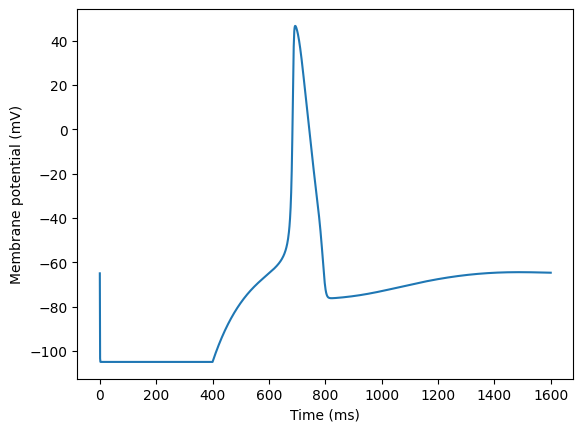

Number of spikes: 1


In [2]:
#FIGURE 1A

h.load_file('stdrun.hoc') # load NEURON's standard run library

# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")
# Create a voltage clamp at the center of the soma
vclamp = h.VClamp(soma(0.5))
vclamp.dur[0] = 10  # hold the potential for 10 ms
vclamp.amp[0] = -105 
vclamp.dur[1] = 0   # release the voltage clamp at 10 ms and record for 30 ms
vclamp.amp[1] = -75 

# Record the membrane potential and the spike times
recording = h.Vector()
recording.record(soma(0.5)._ref_v)

spike_times = h.Vector()
spike_detector = h.APCount(soma(0.5))
spike_detector.record(spike_times)

# Set the simulation time and run the simulation
h.tstop = 40 
h.run()

# Plot the results
import matplotlib.pyplot as plt
plt.plot(recording)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()

print(f"Number of spikes: {len(spike_times)}")

Changed dt


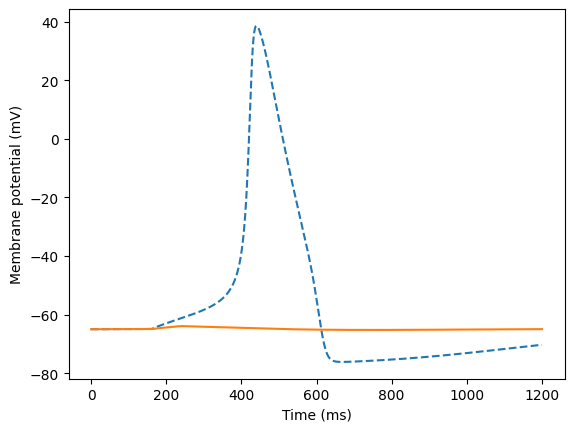

In [3]:
#Figure 1b 

# Load NEURON's standard run library
h.load_file('stdrun.hoc')

# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")

# Set up the stimulation protocol
stim1 = h.IClamp(soma(0.5))
stim1.delay = 2 
stim1.dur = 4
stim1.amp = 7

fig2 = h.Section(name="soma")
soma2 = fig2
soma2.insert("hh")

stim2 = h.IClamp(soma2(0.5))
stim2.delay = 2 
stim2.dur = 1
stim2.amp = 2


# Record the membrane potential and the spike times
recording = h.Vector()
recording.record(soma(0.5)._ref_v)

recording2 = h.Vector()
recording2.record(soma2(0.5)._ref_v)

# Set the simulation time and run the simulation
h.tstop = 15 
h.dt = 0.01 
h.run()

# Plot the results

plt.plot(recording,linestyle='--') 
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
#plt.show()

plt.plot(recording2,label='2') 

plt.show()


Changed dt


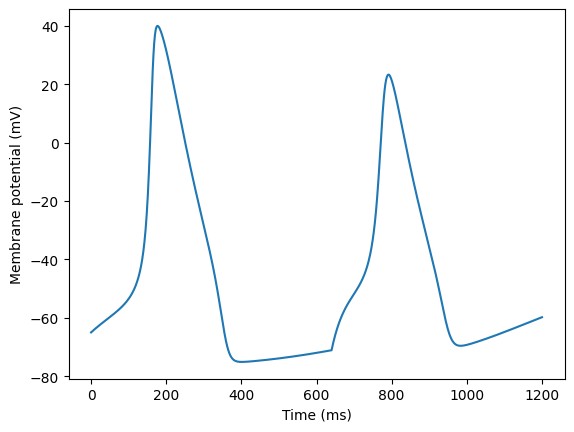

In [4]:
#FIGURE 1C

# Load NEURON's standard run library
h.load_file('stdrun.hoc')

# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")

# Set up the stimulation protocol
stim1 = h.IClamp(soma(0.5))
stim1.delay = 0 
stim1.dur = 8 
stim1.amp = 15 

stim2 = h.IClamp(soma(0.5))
stim2.delay = 8
stim2.dur = 7 
stim2.amp = 90 


# Record the membrane potential and the spike times
recording = h.Vector()
recording.record(soma(0.5)._ref_v)

# Set the simulation time and run the simulation
h.tstop = 15
h.dt = 0.01 
h.run()

# Plot the results
import matplotlib.pyplot as plt
plt.plot(recording) 
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')

plt.show()

Changed dt


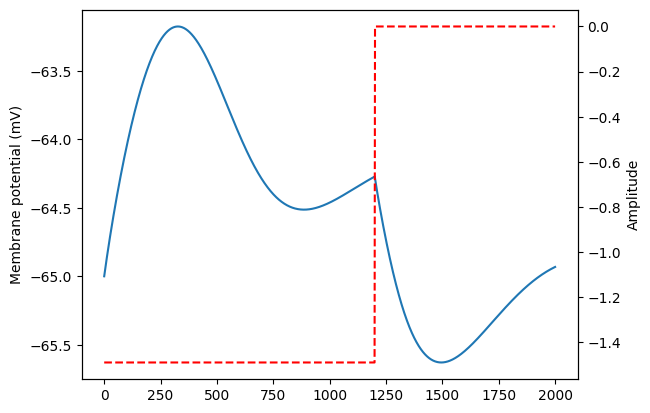

In [5]:
#FIGURE 1d

# Load NEURON's standard run library
h.load_file('stdrun.hoc')


# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")

h.finitialize(-75)
# Set up the stimulation protocol
stim1 = h.IClamp(soma(0.5))
stim1.delay = 0 
stim1.dur = 15 
stim1.amp = 1.49 

# Record the membrane potential and the spike times
recording = h.Vector()
recording.record(soma(0.5)._ref_v)

# Set the simulation time and run the simulation
h.tstop = 25
h.dt = 0.01 
h.run()

# Plot the results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.set_ylabel('Membrane potential (mV)')
ax1.plot(recording) 

ax2 = ax1.twinx()

x = np.linspace(0, 2000, 1000)
y = np.zeros(len(x))
y[:int(len(x)*stim1.dur/25)] = -stim1.amp
ax2.plot(x, y, linestyle='--', color = 'red')

ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Amplitude')

plt.show()


-25.0
Changed dt


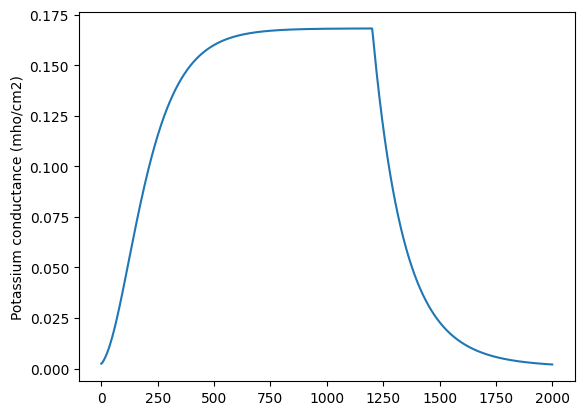

In [6]:
#Fig 2

# Load NEURON's standard run library
h.load_file('stdrun.hoc')

# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")
soma.gkbar_hh = 0.24
soma(0.5).v = -25
print(soma(0.5).v)
# Set up the stimulation protocol using a voltage clamp
stim = h.VClamp(soma(0.5))
stim.dur[0] = 15 # duration of the stimulus
stim.amp[0] = 3 # voltage step

# Record the membrane potential and the potassium conductance
recording_v = h.Vector()
recording_gk = h.Vector()
recording_v.record(soma(0.5)._ref_v)
recording_gk.record(soma(0.5).hh._ref_gk)

# Set the simulation time and run the simulation
h.finitialize(-75*mV)
h.tstop = 25
h.dt = 0.01 
h.run()

# Plot the results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot the simulated membrane potential
t = [i*h.dt for i in range(int(h.tstop/h.dt))]

# Plot the simulated potassium conductance
# ax2 = ax1.twinx()
ax1.plot(recording_gk)
ax1.set_ylabel('Potassium conductance (mho/cm2)')
ax1.tick_params(axis='y')

# Show the plot
plt.show()

Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt


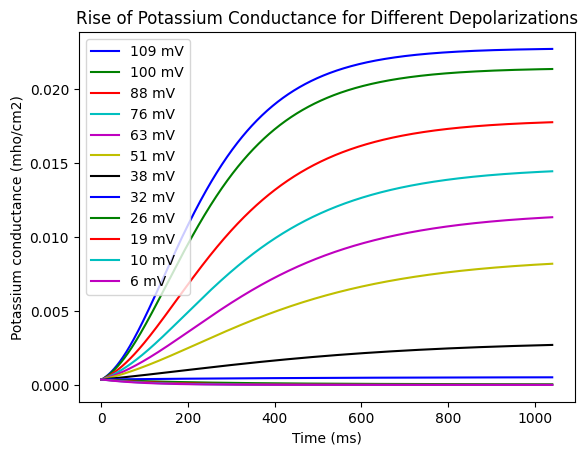

In [7]:
# Load NEURON's standard run library
h.load_file('stdrun.hoc')
h.celsius = 6
# Create a cell membrane
soma = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma.insert("hh")

# Set up the stimulation protocol using a voltage clamp
stim = h.VClamp(soma(0.5))
stim.dur[0] =100 # duration of the stimulus

# Record the membrane potential and the potassium conductance
recording_v = h.Vector()
recording_gk = h.Vector()
recording_v.record(soma(0.5)._ref_v)
recording_gk.record(soma(0.5).hh._ref_gk)

# Set the simulation time and run the simulation for different depolarizations
depolarizations = [-6, -10,-19, -26,- 32, -38, -51, -63, -76, -88, -100, -109]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm']
for i in range(len(depolarizations)):
    stim.amp[0] = depolarizations[i]
    h.finitialize(-75*mV)
    h.tstop = 13
    h.dt = 0.01 
    h.run()
    t = [i*h.dt for i in range(int(h.tstop/h.dt))]
    plt.plot(recording_gk, label=str(-depolarizations[len(depolarizations)-i-1])+' mV', color=colors[i])

# Set the plot parameters
plt.xlabel('Time (ms)')
plt.ylabel('Potassium conductance (mho/cm2)')
plt.title('Rise of Potassium Conductance for Different Depolarizations')
plt.legend()

# Show the plot
plt.show()

-25.0
Changed dt


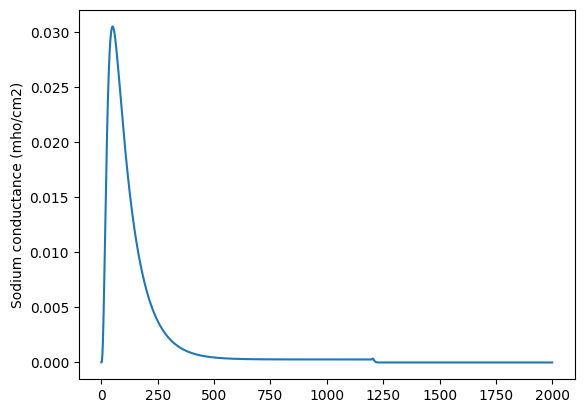

In [8]:
#Fig 2

# Load NEURON's standard run library
h.load_file('stdrun.hoc')

# Create a cell membrane
fig1 = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma = fig1
soma.insert("hh")
soma.gkbar_hh = 0.24
soma(0.5).v = -25
print(soma(0.5).v)
# Set up the stimulation protocol using a voltage clamp
stim = h.VClamp(soma(0.5))
stim.dur[0] = 15 # duration of the stimulus
stim.amp[0] = 3 # voltage step

# Record the membrane potential and the potassium conductance
recording_v = h.Vector()
recording_gk = h.Vector()
recording_v.record(soma(0.5)._ref_v)
recording_gk.record(soma(0.5).hh._ref_gna)

# Set the simulation time and run the simulation
h.finitialize(-75*mV)
h.tstop = 25
h.dt = 0.01 
h.run()

# Plot the results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot the simulated membrane potential
t = [i*h.dt for i in range(int(h.tstop/h.dt))]

# Plot the simulated potassium conductance
# ax2 = ax1.twinx()
ax1.plot(recording_gk)
ax1.set_ylabel('Sodium conductance (mho/cm2)')
ax1.tick_params(axis='y')

# Show the plot
plt.show()

Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt
Changed dt


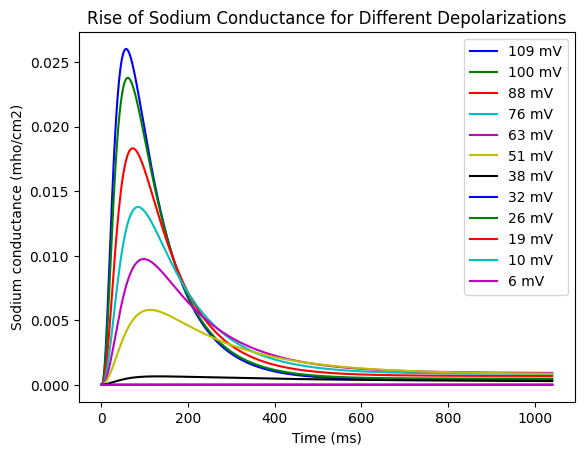

In [9]:
# Load NEURON's standard run library
h.load_file('stdrun.hoc')
h.celsius = 6
# Create a cell membrane
soma = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma.insert("hh")

# Set up the stimulation protocol using a voltage clamp
stim = h.VClamp(soma(0.5))
stim.dur[0] =100 # duration of the stimulus

# Record the membrane potential and the potassium conductance
recording_v = h.Vector()
recording_gk = h.Vector()
recording_v.record(soma(0.5)._ref_v)
recording_gk.record(soma(0.5).hh._ref_gna)

# Set the simulation time and run the simulation for different depolarizations
depolarizations = [-6, -10,-19, -26,- 32, -38, -51, -63, -76, -88, -100, -109]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm']
for i in range(len(depolarizations)):
    stim.amp[0] = depolarizations[i]
    h.finitialize(-75*mV)
    h.tstop = 13
    h.dt = 0.01 
    h.run()
    t = [i*h.dt for i in range(int(h.tstop/h.dt))]
    plt.plot(recording_gk, label=str(-depolarizations[len(depolarizations)-i-1])+' mV', color=colors[i])

# Set the plot parameters
plt.xlabel('Time (ms)')
plt.ylabel('Sodium conductance (mho/cm2)')
plt.title('Rise of Sodium Conductance for Different Depolarizations')
plt.legend()

# Show the plot
plt.show()

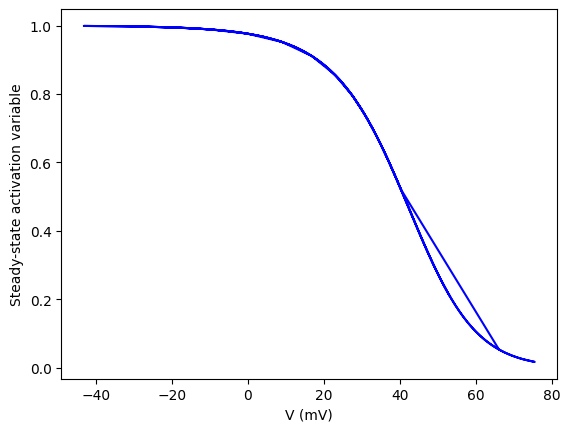

In [10]:
#

# Define the Hodgkin-Huxley model equations
soma1 = h.Section(name='soma')

C_m = 1.0 # Membrane capacitance (uF/cm^2)
E_Na = 115.0 # Sodium reversal potential (mV)
E_K = -12.0 # Potassium reversal potential (mV)
E_L = 10.6 # Leak reversal potential (mV)
g_Na = 120.0 # Sodium conductance (mS/cm^2)
g_K = 36.0 # Potassium conductance (mS/cm^2)
g_L = 0.3 # Leak conductance (mS/cm^2)

soma1.insert('hh') # Insert Hodgkin-Huxley mechanism
soma1.gnabar_hh = g_Na # Set sodium conductance
soma1.gkbar_hh = g_K # Set potassium conductance
soma1.gl_hh = g_L # Set leak conductance
soma1.el_hh = E_L # Set leak reversal potential

# Set up recording of m_inf
v1 = h.Vector().record(soma1(0.5)._ref_v) 
m_inf = h.Vector().record(soma1(0.5)._ref_minf_hh)

h.run()

# Plot the results
plt.plot(1-v1, m_inf, color='blue')
plt.xlabel('V (mV)')
plt.ylabel('Steady-state activation variable')
plt.show()

Changed dt


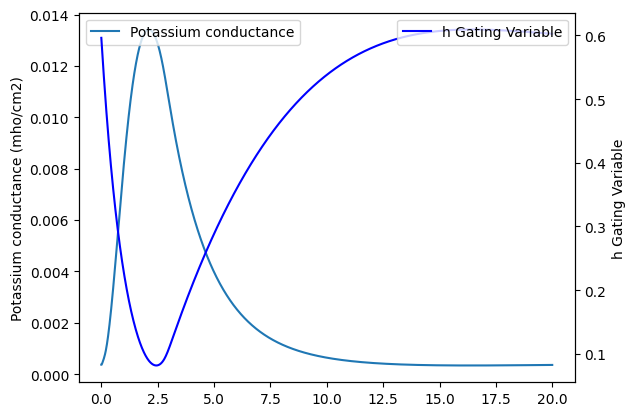

In [14]:
#FIG 19
# Load NEURON's standard run library
h.load_file('stdrun.hoc')

# Create a cell membrane
soma = h.Section(name="soma")

# Insert Hodgkin-Huxley channels in the soma
soma.insert("hh")

# Set up the stimulation protocol using a voltage clamp
stim = h.VClamp(soma(0.5))
stim.dur[0] = 0.1 # duration of the stimulus
stim.amp[0] = 15 # voltage step of 15 mV depolarization

# Record the membrane potential and the sodium and potassium conductances
recording_v = h.Vector()
recording_gna = h.Vector()
recording_gk = h.Vector()
recording_v.record(soma(0.5)._ref_v)
recording_gna.record(soma(0.5).hh._ref_gna)
recording_gk.record(soma(0.5).hh._ref_gk)
recording_h = h.Vector()
recording_h.record(soma(0.5)._ref_h_hh)


# Set the simulation time and run the simulation
h.finitialize(-75*mV)
h.tstop = 20
h.dt = 0.01 
h.run()

# Plot the results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
t = [i*h.dt for i in range(int(h.tstop/h.dt)+1)]

# Plot the simulated potassium conductance
ax1.plot(t, recording_gk, label='Potassium conductance')

# Set the y-axis label for the first plot
ax1.set_ylabel('Potassium conductance (mho/cm2)')

# Create a second y-axis for the membrane potential
ax2 = ax1.twinx()

# Plot the simulated gating variable
ax2.plot(t, recording_h, 'b', label='h Gating Variable')
ax2.set_ylabel('h Gating Variable')

# Set the x-axis label
ax2.set_xlabel('Time (ms)')

# Create the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()



Mean alpha: 0.10053128331678528
Mean beta: 0.50025342516803
Standard deviation of alpha: 0.05518939894345005
Standard deviation of beta: 0.09885479302142867


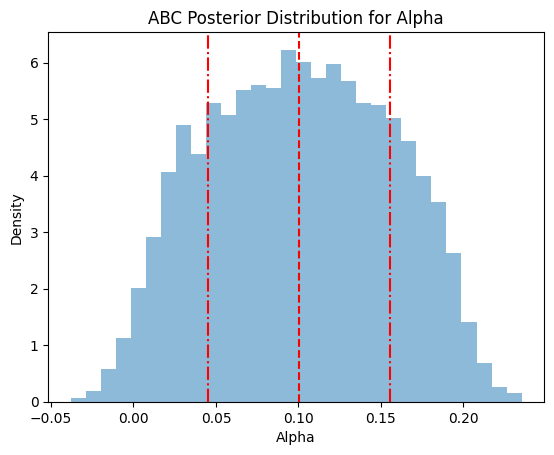

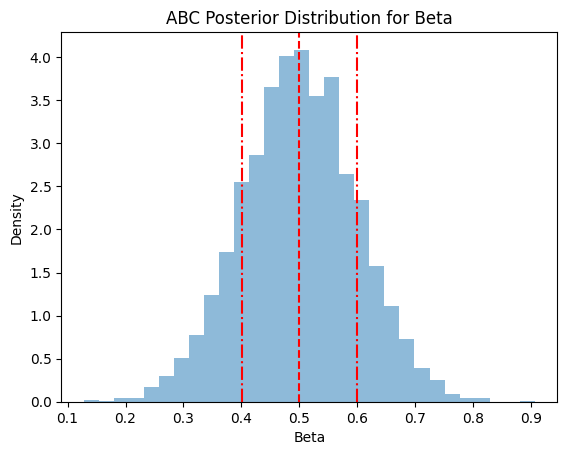

In [12]:
import numpy as np
from scipy.stats import norm

# Define the true parameter values
true_alpha = 0.1
true_beta = 0.5

# Generate simulated data
def simulate_data(alpha, beta, n):
    x = np.random.normal(loc=alpha, scale=beta, size=n)
    return x

# Define the summary statistic function
def summary_statistic(data):
    return np.mean(data)

# Define the distance function
def distance(x, y):
    return np.abs(x - y)

# Define the ABC algorithm function
def abc_algorithm(true_alpha, true_beta, n, num_samples, epsilon):
    samples = []
    for i in range(num_samples):
        # Generate proposed parameters from a normal distribution
        alpha_prop = np.random.normal(loc=true_alpha, scale=0.1)
        beta_prop = np.random.normal(loc=true_beta, scale=0.1)

        # Simulate data from the proposed parameters
        data_sim = simulate_data(alpha_prop, beta_prop, n)

        # Compute the summary statistics of the simulated data
        ss_sim = summary_statistic(data_sim)

        # Compute the distance between the summary statistics of the simulated data and the observed data
        d = distance(ss_sim, true_alpha)

        # Accept or reject the proposed parameters based on the distance and the tolerance level (epsilon)
        if d < epsilon:
            samples.append((alpha_prop, beta_prop))

    return np.array(samples)

# Set the algorithm parameters
n = 1000 # sample size
num_samples = 10000 # number of samples
epsilon = 0.1 # tolerance level

# Run the ABC algorithm
samples = abc_algorithm(true_alpha, true_beta, n, num_samples, epsilon)

# Calculate the mean and standard deviation of the accepted parameters
alpha_mean = np.mean(samples[:, 0])
beta_mean = np.mean(samples[:, 1])
alpha_std = np.std(samples[:, 0])
beta_std = np.std(samples[:, 1])

# Print the results
print("Mean alpha:", alpha_mean)
print("Mean beta:", beta_mean)
print("Standard deviation of alpha:", alpha_std)
print("Standard deviation of beta:", beta_std)

# Plot the distribution of accepted alpha values
import matplotlib.pyplot as plt

plt.hist(samples[:, 0], density=True, bins=30, alpha=0.5)
plt.axvline(x=alpha_mean, color='r', linestyle='--')
plt.axvline(x=alpha_mean - alpha_std, color='r', linestyle='-.')
plt.axvline(x=alpha_mean + alpha_std, color='r', linestyle='-.')
plt.xlabel('Alpha')
plt.ylabel('Density')
plt.title('ABC Posterior Distribution for Alpha')
plt.show()


# Plot the distribution of accepted beta values
plt.hist(samples[:, 1], density=True, bins=30, alpha=0.5)
plt.axvline(x=beta_mean, color='r', linestyle='--')
plt.axvline(x=beta_mean - beta_std, color='r', linestyle='-.')
plt.axvline(x=beta_mean + beta_std, color='r', linestyle='-.')
plt.xlabel('Beta')
plt.ylabel('Density')
plt.title('ABC Posterior Distribution for Beta')
plt.show()

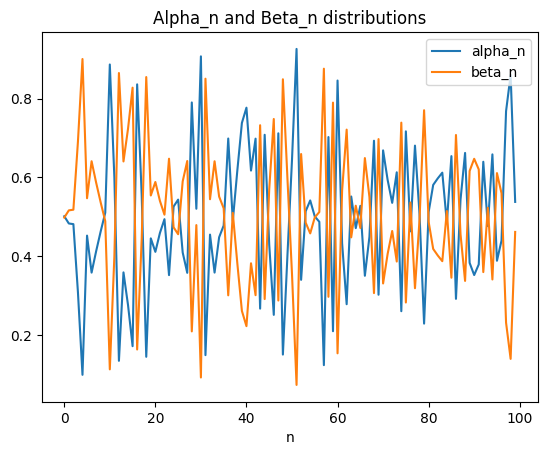

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set the length of the array
n = 100

# Define the prior distribution
prior_mean = 0
prior_std = 1

# Define the kernel distribution
kernel_mean = 0
kernel_std = 0.1

# Generate the prior distribution
prior = np.random.normal(prior_mean, prior_std, n)

# Generate the kernel distribution
kernel = np.random.normal(kernel_mean, kernel_std, n)

# Calculate the posterior distribution
posterior = prior + kernel

# Separate the posterior distribution into alpha_n and beta_n
alpha_n = 0.5*(1 + np.tanh(posterior/2))
beta_n = 0.5*(1 - np.tanh(posterior/2))

# Plot the alpha_n and beta_n distributions
fig, ax = plt.subplots()
ax.plot(alpha_n, label='alpha_n')
ax.plot(beta_n, label='beta_n')
ax.set_xlabel('n')
#ax.set_ylabel('Probability')
ax.set_title('Alpha_n and Beta_n distributions')
ax.legend()
plt.show()